In [ ]:
# Morning Imports
!pip install textacy --quiet
!pip install rake_nltk --quiet

import spacy
import string
import textacy
import itertools
from nltk import pos_tag
from rake_nltk import Rake
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk import tree2conlltags
from gensim.summarization import keywords
from nltk.chunk.regexp import RegexpParser
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

# Afternoon Imports 

import pandas as pd
from nltk.text import Text
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
PATH = '/content/drive/MyDrive/Thinkful Work/NLP/cnn_lite'

DOC_PATTERN = r'.*\.txt'
corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

In [ ]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]

In [ ]:
doc = docs[0]

In [ ]:
doc

'Des Moines, Iowa (CNN) - Rep. Alexandria Ocasio-Cortez capped her debut on the Iowa hustings in support of Bernie Sanders last week with a blunt call to action. "This is not about something that we allow to happen to us. We don\'t let this race happen to us," she said at a rally for the Vermont senator in Council Bluffs. "We don\'t watch the presidential race. This is not a movie, this a movement." And yet, there has been a certain cinematic quality to the last six weeks of Sanders\' second Democratic presidential campaign. Nearly sidelined, or worse, by a heart attack in Las Vegas on the first night of October, Sanders has charted a remarkable revival. It\'s been powered by a run of invigorating endorsements, new poll results that showed him gaining steam in New Hampshire and Iowa, and the sense, fueled in part by the massive crowds that welcomed him during recent rallies in New York and Minnesota, that his "political revolution" was, after a trying summer, back on the march. There a

## KeyWords 

In [ ]:
#Uses the textrank to extract and score Keywords
keywords(doc, words=5, lemmatize=True).split('\n')

['sanders', 'campaign', 'news', 'democrats', 'recent']

## Key Phrases

In [ ]:
r = Rake()
r.extract_keywords_from_text(doc)
r.get_ranked_phrases_with_scores()

[(64.35555555555555,
  'win ," campaign manager faiz shakir told cnn last month'),
 (52.0, 'billionaire former new york city mayor michael bloomberg'),
 (33.0, 'former vice president joe biden came'),
 (24.83888888888889, 'tell donald trump ," sanders said'),
 (23.333333333333332, '© 2019 cable news network'),
 (23.0, 'one else touched double digits'),
 (21.17222222222222, 'beauty contest ," sanders said'),
 (21.0, 'appeal wane without clinton around'),
 (17.666666666666668, 'fellow progressive icon elizabeth warren'),
 (17.666666666666664, 'tell donald trump ?,"'),
 (17.416666666666664, 'recent debate last month'),
 (16.333333333333332, 'like former texas rep'),
 (16.17222222222222, 'president ," sanders said'),
 (16.0, 'elected leader famously disinclined'),
 (16.0, 'arterial functions felt like'),
 (15.2, 'bernie sanders last week'),
 (15.0, 'increasingly influential leftist movement'),
 (14.95, 'sanders invited television cameras'),
 (13.666666666666666, 'working class coalition re

In [ ]:
def get_ranked_phrases(doc, n):
  r=Rake()
  r.extract_keywords_from_text(doc)

  return r.get_ranked_phrases_with_scores()[:n]

In [ ]:
keyphrases = [get_ranked_phrases(doc, 5) for doc in docs]

In [ ]:
keyphrases[4]

[(25.0, '© 2019 cable news network'),
 (20.625, 'unusual ," said sjoerd hulshof'),
 (14.8, 'discover new things ."'),
 (14.5, 'like many young people'),
 (13.958333333333334, 'sponge ," said alexander')]

## Name Entity Recognition 


In [ ]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
nlp = spacy.load('en_core_web_sm')

spacy_doc = nlp(doc)

In [ ]:
type(spacy_doc)

spacy.tokens.doc.Doc

In [ ]:
for sent in spacy_doc.sents:
  print(sent)
  print('-----'*10)

Des Moines, Iowa (CNN) -
--------------------------------------------------
Rep. Alexandria Ocasio-Cortez capped her debut on the Iowa hustings in support of Bernie Sanders last week with a blunt call to action.
--------------------------------------------------
"This is not about something that we allow to happen to us.
--------------------------------------------------
We don't let this race happen to us," she said at a rally for the Vermont senator in Council Bluffs.
--------------------------------------------------
"We don't watch the presidential race.
--------------------------------------------------
This is not a movie, this a movement."
--------------------------------------------------
And yet, there has been a certain cinematic quality to the last six weeks of Sanders' second Democratic presidential campaign.
--------------------------------------------------
Nearly sidelined, or worse, by a heart attack in Las Vegas on the first night of October, Sanders has charted a rema

In [ ]:
for entity in spacy_doc.ents:
  print(entity.text, '-', entity.label_)

Des Moines - GPE
Iowa - GPE
CNN - ORG
Alexandria Ocasio-Cortez - PERSON
Iowa - GPE
Bernie Sanders - PERSON
last week - DATE
Vermont - GPE
Council Bluffs - ORG
the last six weeks - DATE
Sanders - ORG
second - ORDINAL
Democratic - NORP
Las Vegas - GPE
the first night of October - TIME
Sanders - ORG
New Hampshire - GPE
Iowa - GPE
New York - GPE
Minnesota - GPE
a trying summer - DATE
march - DATE
Sanders - ORG
Saturday - DATE
Des Moines - GPE
three - CARDINAL
Drake University - ORG
one - CARDINAL
Ocasio-Cortez - ORG
Ilhan Omar - PERSON
Rashida Tlaib - PERSON
last month - DATE
Ohio - GPE
Sanders - ORG
months - DATE
Democratic - NORP
Sanders - ORG
About two weeks - DATE
CNN - ORG
Democrats - NORP
New Hampshire - GPE
21% - PERCENT
Elizabeth Warren's - PERSON
18% - PERCENT
Joe Biden - PERSON
15% - PERCENT
South Bend - GPE
Indiana - GPE
Pete Buttigieg - PERSON
fourth - ORDINAL
10% - PERCENT
Democrats - NORP
Iowa - GPE
Bernie - PERSON
nearly a century - DATE
the White House - ORG
Democratic - NO

In [ ]:
entities = [[entity.text, entity.label_] for entity in spacy_doc.ents]
entities

[['Des Moines', 'GPE'],
 ['Iowa', 'GPE'],
 ['CNN', 'ORG'],
 ['Alexandria Ocasio-Cortez', 'PERSON'],
 ['Iowa', 'GPE'],
 ['Bernie Sanders', 'PERSON'],
 ['last week', 'DATE'],
 ['Vermont', 'GPE'],
 ['Council Bluffs', 'ORG'],
 ['the last six weeks', 'DATE'],
 ['Sanders', 'ORG'],
 ['second', 'ORDINAL'],
 ['Democratic', 'NORP'],
 ['Las Vegas', 'GPE'],
 ['the first night of October', 'TIME'],
 ['Sanders', 'ORG'],
 ['New Hampshire', 'GPE'],
 ['Iowa', 'GPE'],
 ['New York', 'GPE'],
 ['Minnesota', 'GPE'],
 ['a trying summer', 'DATE'],
 ['march', 'DATE'],
 ['Sanders', 'ORG'],
 ['Saturday', 'DATE'],
 ['Des Moines', 'GPE'],
 ['three', 'CARDINAL'],
 ['Drake University', 'ORG'],
 ['one', 'CARDINAL'],
 ['Ocasio-Cortez', 'ORG'],
 ['Ilhan Omar', 'PERSON'],
 ['Rashida Tlaib', 'PERSON'],
 ['last month', 'DATE'],
 ['Ohio', 'GPE'],
 ['Sanders', 'ORG'],
 ['months', 'DATE'],
 ['Democratic', 'NORP'],
 ['Sanders', 'ORG'],
 ['About two weeks', 'DATE'],
 ['CNN', 'ORG'],
 ['Democrats', 'NORP'],
 ['New Hampshire', '

In [ ]:
from spacy import displacy

displacy.render(spacy_doc, style='ent', jupyter=True, options={'distance': 90})

## Relationship Extraction

In [ ]:
# SVO - Subject, Verb, Object
import textacy 

results = []

for sent in spacy_doc.sents:
  svo = textacy.extract.subject_verb_object_triples(sent)

  results += svo

In [ ]:
# De-duplicate our svo results
results = list(set(results))

# Afternoon Lecture - Explore and Analysing text

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def text_stats(doc):
  sents = sent_tokenize(doc)
  tokens = word_tokenize(doc)
  words = [token.lower() for token in tokens 
           if token.lower() not in stopwords.words('english') 
           if token not in string.punctuation]

  num_sents = len(sents)
  num_tokens = len(tokens)
  num_words = len(words)
  vocab = len(set(words)) 
  characters = sum([len(word) for word in words]) # total number of characters

  spacy_doc = nlp(doc)
  # Filter out numeric entity types
  remove = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY', 'ORDINAL',
            'CARDINAL']

  entities = [entity.text for entity in spacy_doc.ents 
              if entity.label_ not in remove]

  num_entities = len(set(entities))
  words_sent = num_words / num_sents
  char_word = characters / num_words
  lex_div = vocab / num_words

  stats = [num_sents, num_tokens, num_words, vocab, num_entities, words_sent, 
           char_word, lex_div]

  return stats

In [ ]:
text_stats(docs[0])

[75,
 1654,
 830,
 538,
 45,
 11.066666666666666,
 5.913253012048193,
 0.6481927710843374]

In [ ]:
stats = []

for i, doc in enumerate(docs):
  doc_stats = text_stats(doc)
  doc_stats = [f'article_{i}'] + doc_stats
  stats.append(doc_stats)

In [ ]:
import pandas as pd

In [ ]:
doc_df = pd.DataFrame(stats)
doc_df.columns = ['Document', 'Sentences', 'Tokens', 'Words', 'Vocabulary', 'Entities', 
                  'Avg. Sent Length', 'Avg. Word Length', 'Lexical Diversity']

doc_df.head()

,Document,Sentences,Tokens,Words,Vocabulary,Entities,Avg. Sent Length,Avg. Word Length,Lexical Diversity
0,article_0,75,1654,830,538,45,11.066667,5.913253,0.648193
1,article_1,20,469,262,179,25,13.100000,6.248092,0.683206
2,article_2,262,4573,2126,1124,91,8.114504,5.942615,0.528692
3,article_3,28,803,454,255,33,16.214286,6.011013,0.561674
4,article_4,34,620,316,204,16,9.294118,5.924051,0.645570


In [ ]:
# corpus.fileids()

In [ ]:
# Checking out rows with seemingly low Entities
doc_df[doc_df['Entities'] == 4]

docs[-2:]

['© 2019 Cable News Network. Turner Broadcasting System, Inc. All Rights Reserved. Listen to CNN (low-bandwidth usage). Go to the full CNN experience.',
 '© 2019 Cable News Network. Turner Broadcasting System, Inc. All Rights Reserved. Listen to CNN (low-bandwidth usage). Go to the full CNN experience.']

In [ ]:
# Select a random document form out list of docs

doc = docs[21]

cleaned = [token.lower() for token in word_tokenize(doc) 
           if token.lower() not in stopwords.words('english') 
           if token.isalpha()]

fdist = FreqDist(cleaned)

In [ ]:
fdist_df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdist_df.columns = ['Term', 'Freq']
fdist_df.head()

,Term,Freq
0,cnn,5
1,puppy,3
2,missouri,2
3,tail,7
4,growing,1


In [ ]:
ordered = fdist_df.sort_values('Freq', ascending=False)

In [ ]:
filtered = ordered[ordered['Freq'] > 1]
filtered.head()

,Term,Freq
10,narwhal,9
3,tail,7
0,cnn,5
23,mission,4
5,forehead,4


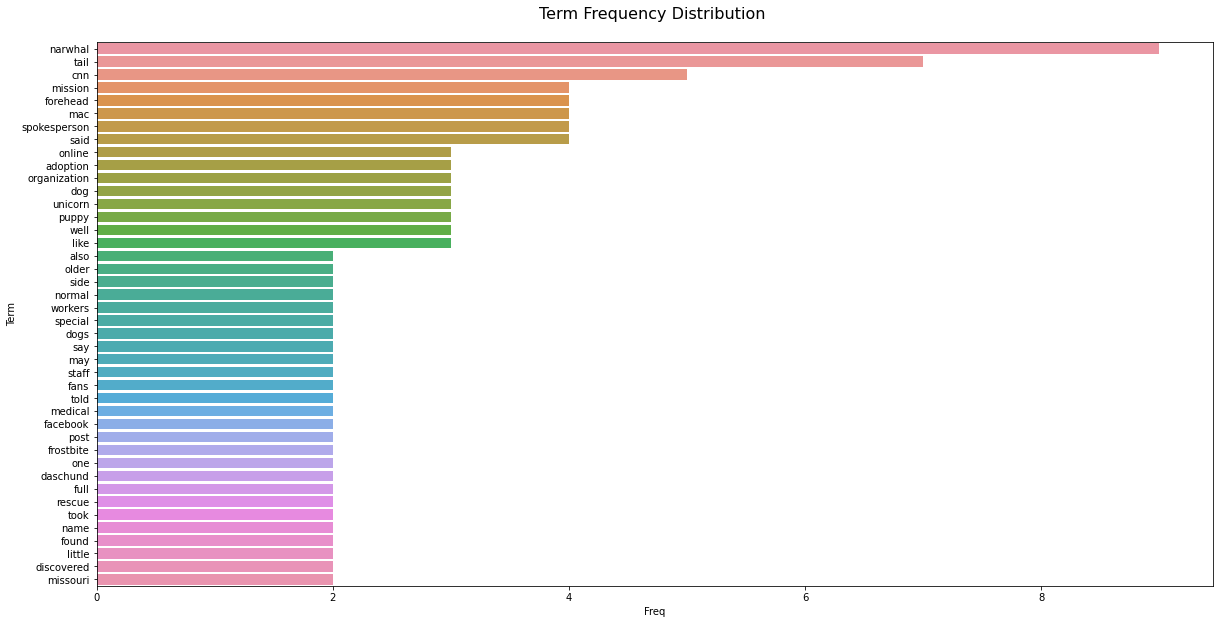

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(data = filtered, x='Freq', y='Term')
plt.title('Term Frequency Distribution \n', fontsize=16)
plt.show()

## WordCloud

In [ ]:
def wordcloud(text, colormap='tab10', background_color='white'):
  cloud = WordCloud(width=1600, height=800, 
                    stopwords=STOPWORDS, 
                    colormap=colormap, 
                    background_color=background_color).generate(text)

  plt.figure(figsize=(12,10))
  plt.imshow(cloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

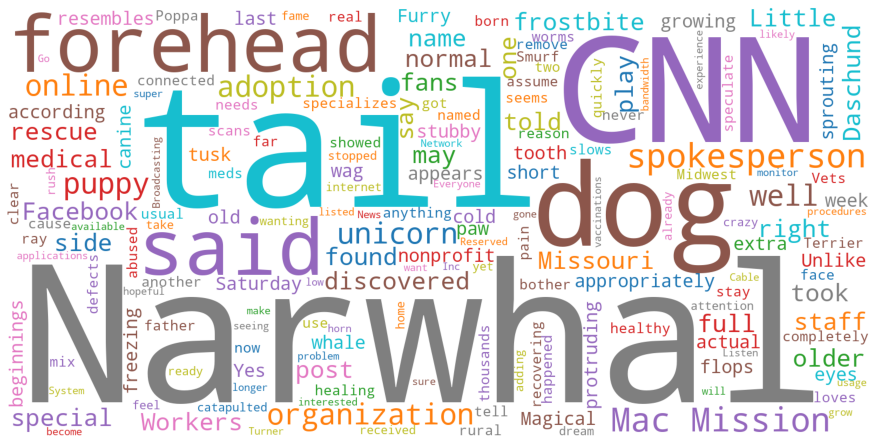

In [ ]:
wordcloud(doc)

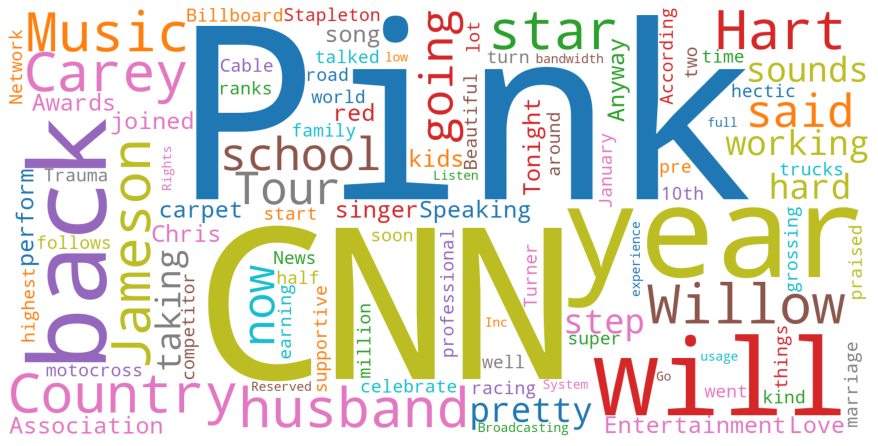

In [ ]:
wordcloud(docs[50])

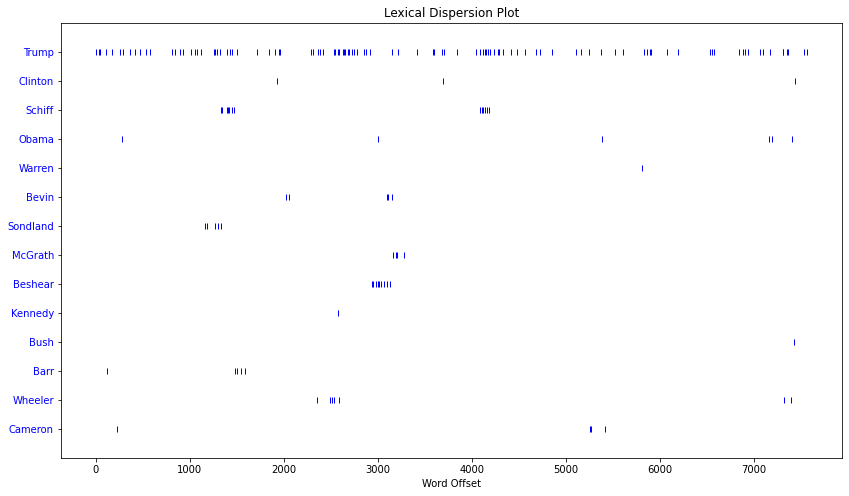

In [ ]:
from pylab import rcParams

rcParams['figure.figsize'] = 14,8

doc = docs[7]
tokenized = word_tokenize(doc)

terms = ['Trump', 'Clinton', 'Schiff', 'Obama', 'Warren', 'Bevin', 'Sondland',
         'McGrath', 'Beshear', 'Kennedy', 'Bush', 'Barr', 'Wheeler', 'Cameron']

Text(tokenized).dispersion_plot(terms)

In [ ]:
from yellowbrick.text.postag import PosTagVisualizer

In [ ]:
doc = docs[43]

tokens = word_tokenize(doc)
tagged = pos_tag(tokens)

visualizer = PosTagVisualizer()
visualizer.transform(tagged)

print(' '.join((visualizer.colorize(token, color) for color, token in visualizer.tagged)))

( CNN ) - Three Democratic heavyweights this week have dangled the possibility of a 2020 White House run , a reflection of the extraordinarily unsettled nature of the Democratic field only a few months before voting begins . On the eve of the first public impeachment hearings , former New York Mayor Michael Bloomberg made a run to Arkansas on Tuesday to secure his spot on that state 's Democratic primary ballot , should he decide to run . Former Massachusetts Gov . Deval Patrick weighed a late entry to the race while facing down Friday 's filing deadline in the key state of New Hampshire . And Hillary Clinton coyly suggested , once again , that she could leap from the sidelines . Clearly enjoying the opportunity to taunt Trump at this vulnerable moment in his presidency , and undoubtedly unnerving some current 2020 Democrats . Clinton told BBC Radio that she was not running for president in 2020 , but she left the door ajar . `` Never say never , and I will certainly tell you I 'm unde